# ML1_Pipeline + Model

Ce notebook est en plusieurs étapes :
1. Comment charger et préparer les données
2. Comment utiliser correctement train_test_split
3. Comment créer des pipelines de prétraitement
4. Comment implémenter et évaluer un modèle de régression

## Objectif
Prédire l'année de plantation des arbres en utilisant les bonnes pratiques de Machine Learning.

## 1. Import des bibliothèques nécessaires et chargement des données.

Nous utilisons plusieurs bibliothèques essentielles :
- pandas et numpy : pour la manipulation des données
- sklearn : pour le Machine Learning
- matplotlib : pour la visualisation

In [2]:
# Les libraries nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


Nous chargeons les données depuis le fichier pickle qui contient notre dataset nettoyé.

In [25]:
# Chargement des données depuis le fichier pickle

with open("df_trees.pkl", "rb") as f:
    df_clean = pd.read_pickle(f)
df_clean = pd.read_pickle("df_trees.pkl")

## 2. Préparation des données pour le ML et séparation train_test

Première étape importante : supprimer les nan de la target puis séparer nos variables explicatives (features) de notre variable cible (target).

Deuxième étape : separation Train-Test

In [4]:
df_clean['ANNEEDEPLANTATION'].info()

<class 'pandas.core.series.Series'>
Index: 30180 entries, 12 to 31617
Series name: ANNEEDEPLANTATION
Non-Null Count  Dtype
--------------  -----
30180 non-null  int64
dtypes: int64(1)
memory usage: 471.6 KB


In [5]:
df_clean['ANNEEDEPLANTATION'].describe()

count    30180.000000
mean      1989.384427
std         17.372641
min       1900.000000
25%       1975.000000
50%       1985.000000
75%       2004.000000
max       2021.000000
Name: ANNEEDEPLANTATION, dtype: float64

In [6]:
df_clean['ANNEEDEPLANTATION'] = df_clean['ANNEEDEPLANTATION'].astype(int)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30180 entries, 12 to 31617
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADR_SECTEUR        30180 non-null  int64  
 1   GENRE_BOTA         30144 non-null  object 
 2   ANNEEDEPLANTATION  30180 non-null  int64  
 3   COLLECTIVITE       30180 non-null  object 
 4   longitude          30180 non-null  float64
 5   latitude           30180 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.6+ MB


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Données
X = df_clean[['ADR_SECTEUR','longitude', 'latitude']]
y = df_clean['ANNEEDEPLANTATION']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
print("R² :", r2_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", rmse)


R² : 0.026361049182075935
RMSE : 17.06515960639114


#### BILAN R² : Le modèle ne parvient pas à prédire l'année de plantation

#### BILAN RMSE : Le modèle n'apprend pas de lien utile entre la position et l'année

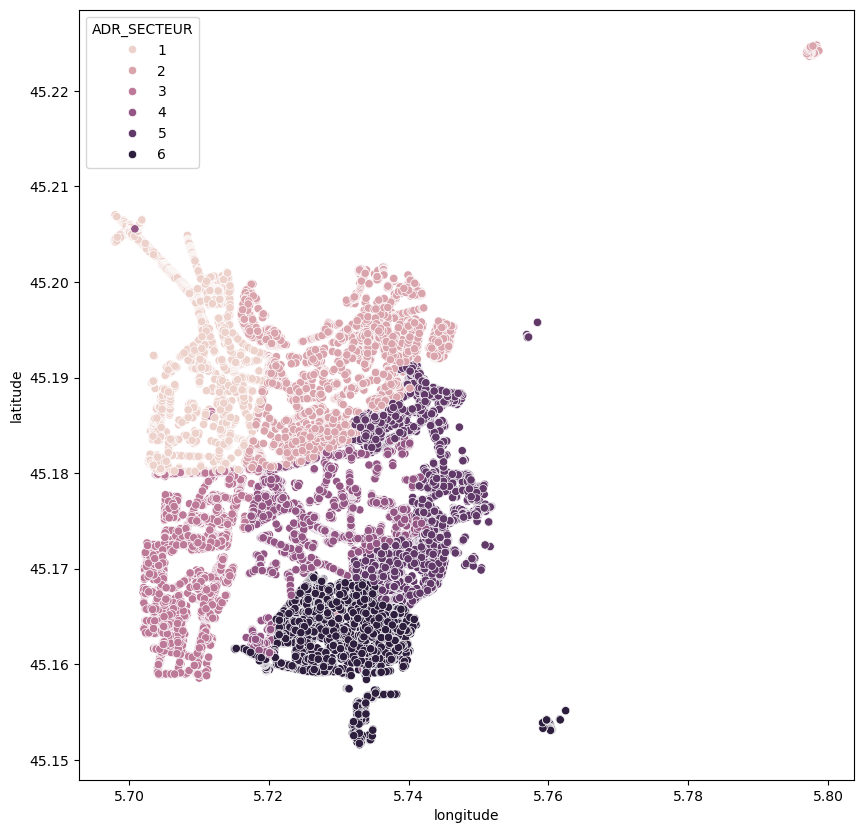

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="longitude", y="latitude", hue="ADR_SECTEUR",
                     data=df_clean, ax=ax)
plt.show()

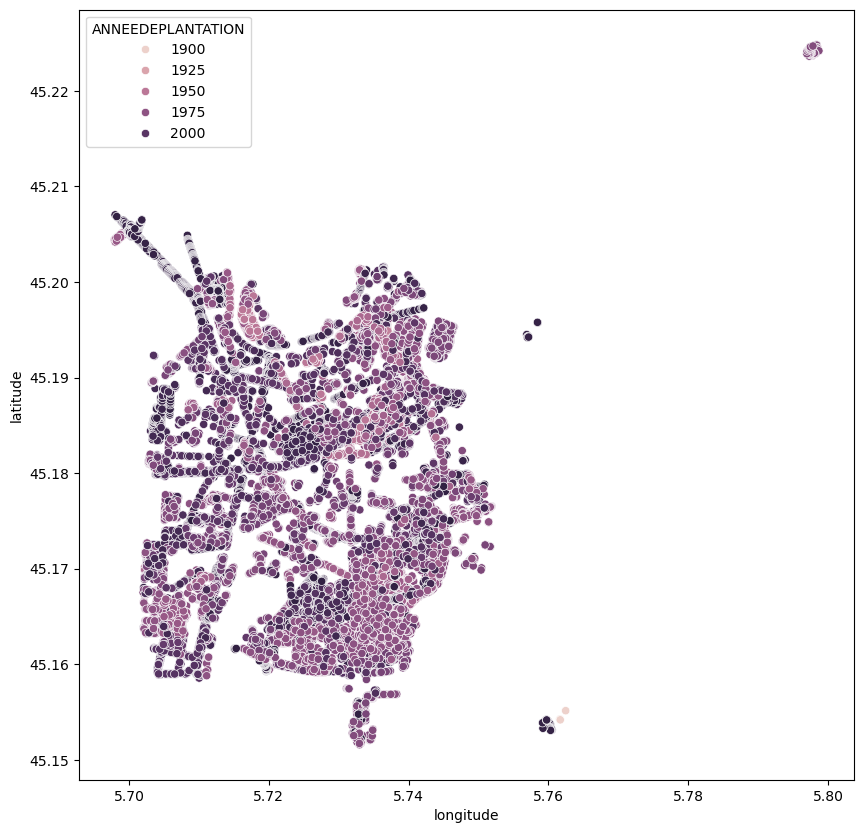

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="longitude", y="latitude", hue="ANNEEDEPLANTATION",
                     data=df_clean, ax=ax)
plt.show()

#### Justifier le preprocessor dans ma dataframe pour d'abord ajuster le fit puis transformer ma data

In [ ]:
# Assure-toi d'avoir le bon nom de cible
target_col = "ANNEEDEPLANTATION"  # <-- adapte

print("Colonnes df_clean:", df_clean.columns.tolist())

# features automatiques
numeric_features = df_clean.select_dtypes(include=["number"]).columns.tolist()
categorical_features = df_clean.select_dtypes(include=["object", "category"]).columns.tolist()
if target_col in numeric_features: numeric_features.remove(target_col)
if target_col in categorical_features: categorical_features.remove(target_col)

# pipeline et model (comme toi)
transformers = [("numeric", numeric_pipeline, numeric_features)]
if len(categorical_features) > 0:
    transformers.append(("category", categorical_pipeline, categorical_features))
preprocessor = ColumnTransformer(transformers=transformers)

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

# predict et métriques
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² : {r2}")
print(f"RMSE : {rmse}")

# Inspecter la matrice transformée sans refitter le preprocessor
X_train_transformed = model.named_steps["preprocessing"].transform(X_train)

# récupérer noms de colonnes (si catégorielles présentes)
preproc_fitted = model.named_steps["preprocessing"]
if len(categorical_features) > 0:
    ohe = preproc_fitted.named_transformers_["category"].named_steps["onehot"]
    ohe_cols = ohe.get_feature_names_out(categorical_features)
    final_columns = numeric_features + list(ohe_cols)
else:
    final_columns = numeric_features

df_transformed = pd.DataFrame(X_train_transformed, columns=final_columns)
print(df_transformed.head())



NameError: name 'preprocessor' is not defined

In [27]:
print(x_prepared.shape)
print(x_prepared[:5])

NameError: name 'x_prepared' is not defined

In [30]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), #remplace les valeurs manquantes (NaN par la médiane de la colonnen)
    ("scaler", StandardScaler()) #Plus robuste si la colonne contient des valeurs extrêmes || met les variables num sur une échelle comparable (moyenne =0 / Ecart-type =1)
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, numeric_features),
        ("category", categorical_pipeline, categorical_features)
])
x_prepared = preprocessor.fit_transform(df_clean)



NameError: name 'numeric_features' is not defined

In [28]:
x_prepared = preprocessor.fit_transform(df_clean)


NameError: name 'preprocessor' is not defined

In [24]:
import pandas as pd

# Récupérer les noms de colonnes du OneHotEncoder
ohe_cols = preprocessor.named_transformers_["cat"]\
    .named_steps["onehot"].get_feature_names_out(categorical_features)

# Colonnes finales
final_columns = numeric_features + list(ohe_cols)

# DataFrame final
df_transformed = pd.DataFrame(X_prepared, columns=final_columns)


NameError: name 'preprocessor' is not defined

In [ ]:
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])


NameError: name 'Pipeline' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
y_pred = model.predict(X_test)


NotFittedError: Pipeline is not fitted yet.

In [ ]:
# Suppression des lignes sans année de plantation
# On peut utiliser la méthode *dropna()* pour supprimer les lignes où la anneedeplantation est NaN

# Séperation train/test
# On peut utiliser la méthode *train_test_split()* de scikit-learn pour séparer les données en ensembles d'entraînement et de test

numeric_features = ['longitude','latitude']
categorical_features = ['GENRE_BOTA', 'ADR_SECTEUR', 'COLLECTIVITE']

numeric = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

categorie = Pipeline(steps=[
    ("cool_imputer", SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder()) #il encode du style RGB
])

tranformation = ColumnTransformer(
    transformers=[
        ('numeric', numeric, numeric_features),
        ('category', categorie, categorical_features)
    ])

# On transforme SEULEMENT X
X_train_processed = tranformation.fit_transform(X_train)
X_test_processed = tranformation.transform(X_test)

print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

# y reste tel quel
y_train = y_train
y_test = y_test


ValueError: A given column is not a column of the dataframe

## [Optionnel] Comment on peut remplir les valeurs manquantes sans utiliser le pipeline?

In [ ]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente pour chaque colonne concernée

## [Optionnel] Création de nouvelles variables (Feature Engineering)

In [ ]:
# Code

## 3. Création des pipelines de prétraitement

Les pipelines sont essentiels pour :
1. Automatiser les transformations
2. Éviter le data leakage
3. Assurer la cohérence entre train et test

### 3.1 Préparation des données & modèle de base

Nous préparons les données en utilisant un pipeline `scikit-learn` :
- **OneHotEncoder** pour les variables catégorielles
- **StandardScaler** pour les variables numériques
- **LinearRegression** comme modèle de base

In [ ]:
# Quelles sont les variables catégorielles et variables numériques ?
# OneHotEncoder ?
# StandardScaler ?

In [ ]:
# [OPTIONNEL] Vérification rapide des valeurs manquantes
# Doit etre 0 pour toutes les colonnes pour le train et le test

## 4. Evaluation avec LinearRegression et plusieurs métriques :
- **MAE** (Mean Absolute Error)
- D'autres?

Ce modèle simple nous servira de point de comparaison pour des modèles plus avancés (comme les arbres de décision ou les forêts aléatoires).

In [ ]:
 # On peut utiliser scikit-learn 'mean_absolute_error' pour évaluer la performance du modèle de régression

## 5. Visualisation des prédictions

Visualisons la relation entre les valeurs réelles et prédites :

In [ ]:
# Code

## Conclusion